In [1]:
import qiskit
import qc_grader
print(f"Qiskit version: {qiskit.__version__}")
print(f"Grader version: {qc_grader.__version__}")

Qiskit version: 2.1.1
Grader version: 0.22.12


In [2]:
# Check that the account has been saved properly
from qiskit_ibm_runtime import QiskitRuntimeService


service = QiskitRuntimeService(name="qgss-2025")
service.saved_accounts()

{'qgss-2025': {'channel': 'ibm_quantum_platform',
  'url': 'https://cloud.ibm.com',
  'token': 'TjsUi7FnctBL0cYkFsJAMNHrGJkb4Pj7Dn4Ct71RTUX9',
  'instance': 'crn:v1:bluemix:public:quantum-computing:us-east:a/0a47d07759a4490eb699bc3560c10e9b:7e0cbe99-6ea4-4ff0-889e-2db9b7a600e9::',
  'verify': True,
  'private_endpoint': False}}

In [3]:
# Essential libraries
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import io

from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit_ibm_runtime import Options, Session, SamplerV2 as Sampler
from qiskit.result import marginal_distribution

from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import AerSimulator

from qc_grader.challenges.qgss_2025 import (
    grade_lab1_ex1_1, 
    grade_lab1_ex1_2, 
    grade_lab1_ex1_3, 
    grade_lab1_ex1_4, 
    grade_lab1_ex2, 
    grade_lab1_ex3,
    grade_lab1_ex4,
    grade_lab1_ex5,
    grade_lab1_ex6
)

# Chapter 1: Superposition, Interference and Measurement

## Exercise 1: Build a quantum circuit for the double-slit experiment

**Exercise 1-1: Make a slit**

In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

# Create quantum and classical registers with specific names as hinted
qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(1, name='c_screen')

# Create the quantum circuit
double_slit = QuantumCircuit(qr, cr)

# Apply Hadamard gate to create superposition (|0⟩ + |1⟩)/√2
# This represents the particle going through both slits simultaneously
double_slit.h(qr[0])

# Draw the circuit
print("Double-Slit Quantum Circuit:")
print(double_slit.draw())

# Test the circuit
grade_lab1_ex1_1(double_slit)

Double-Slit Quantum Circuit:
            ┌───┐
         q: ┤ H ├
            └───┘
c_screen: 1/═════
                 
Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


**Exercise 1-2: Make a screen**

In [5]:
double_slit.h(qr[0])

# Measure the qubit and store result in c_screen
double_slit.measure(qr[0], cr[0])

# Display the circuit
print("Double-Slit with Screen:")
print(double_slit.draw())


Double-Slit with Screen:
            ┌───┐┌───┐┌─┐
         q: ┤ H ├┤ H ├┤M├
            └───┘└───┘└╥┘
c_screen: 1/═══════════╩═
                       0 


In [6]:
grade_lab1_ex1_2(double_slit)


Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


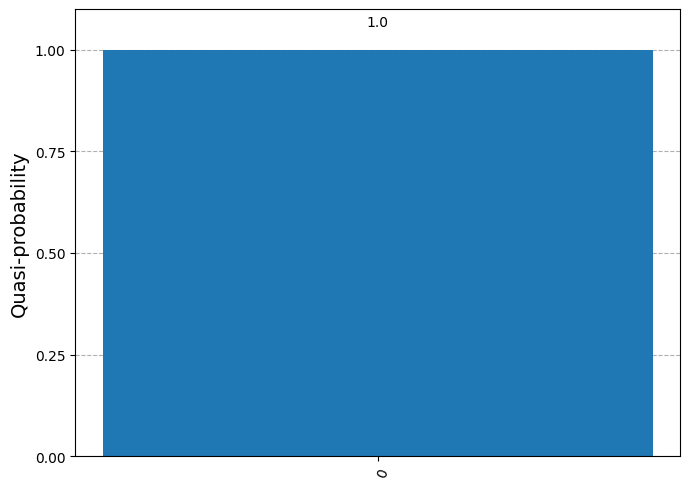

In [7]:
# use simulator
backend = AerSimulator()

# make quantum circuit compatible to the backend
pm = generate_preset_pass_manager(backend = backend, optimization_level=3)
qc_isa = pm.run(double_slit)

# run and get counts
sampler = Sampler(mode=backend)
counts = sampler.run([qc_isa], shots = 1000).result()[0].data.c_screen.get_counts()

plot_distribution(counts)

**Exercise 1-3: Make a difference**

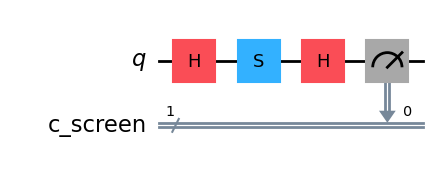

In [8]:
qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(1, name='c_screen')

double_slit_with_difference = QuantumCircuit(qr, cr)

# First Hadamard - creates superposition
double_slit_with_difference.h(qr[0])

# Add S gate to introduce π/2 phase difference to |1⟩ state
double_slit_with_difference.s(qr[0])

# Second Hadamard - models the screen interference
double_slit_with_difference.h(qr[0])

# Measure
double_slit_with_difference.measure(qr[0], cr[0])

# Display
double_slit_with_difference.draw('mpl')

In [9]:
grade_lab1_ex1_3(double_slit_with_difference)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


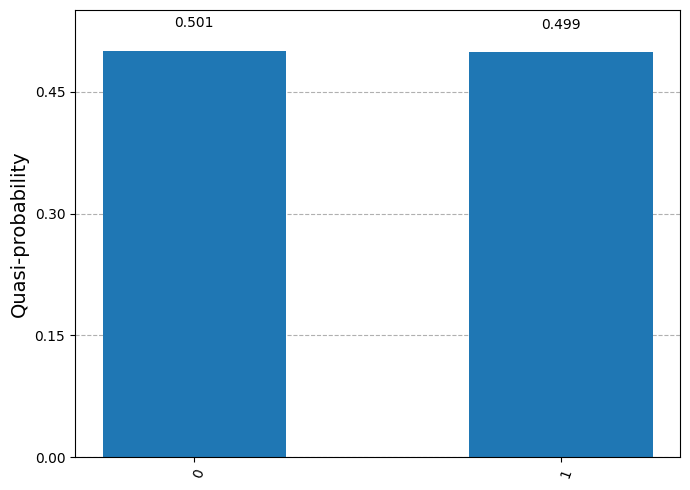

In [10]:
qc_isa = pm.run(double_slit_with_difference)

#run and get counts
sampler = Sampler(mode=backend)
counts = sampler.run([qc_isa], shots=10000).result()[0].data.c_screen.get_counts()
plot_distribution(counts)

**Exercise 1-4: Beautiful Fringes**

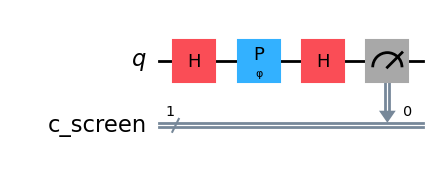

In [11]:
φ = Parameter('φ')

qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(1, name='c_screen')

double_slit_fringe = QuantumCircuit(qr, cr)

# H-gate to create superposition
double_slit_fringe.h(qr[0])

# P(φ) gate to apply variable phase difference
double_slit_fringe.p(φ, qr[0])

# H-gate to create interference pattern
double_slit_fringe.h(qr[0])

# Measure q and save to c_screen
double_slit_fringe.measure(qr[0], cr[0])

# Display the circuit
double_slit_fringe.draw('mpl')

In [12]:
grade_lab1_ex1_4(double_slit_fringe)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


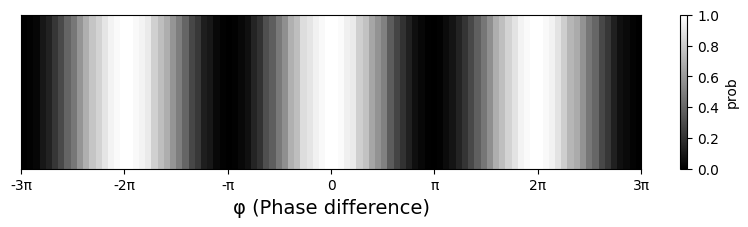

In [13]:
φ_lst = np.linspace(-3*np.pi, 3*np.pi, 100)
qc_isa = pm.run(double_slit_fringe)

φ_hit = []
dist = sampler.run([(qc_isa, φ_lst)], shots=1000).result()[0].data.c_screen

for i  in range(len(φ_lst)):
    result = dist[i].get_counts()
    if '0' in result:
        φ_hit.append(result['0']/1000)
    else:
        φ_hit.append(0)

#plot heat map
φ_hit_2d = np.array(φ_hit).reshape(1, -1)

plt.figure(figsize=(10, 2))
plt.imshow(φ_hit_2d, cmap='gray', aspect='auto', extent=[-3*np.pi, 3*np.pi, 0, 0.1])

plt.xlabel('φ (Phase difference)', fontsize=14)
plt.colorbar(label='prob')
plt.xticks(ticks=[-3*np.pi, -2*np.pi, -np.pi, 0, np.pi, 2*np.pi, 3*np.pi],
           labels=['-3π', '-2π', '-π', '0', 'π', '2π', '3π'])
plt.yticks([])  
plt.show()

## Exercise 2: Is the cat happy or grumpy?

In [14]:
def schrodingers_cat_experiment_theta(theta):
    qc = QuantumCircuit(1)
    
    #your code start here
    # Apply RX gate with the given theta parameter
    qc.rx(theta, 0)
    #end of your code
    
    qc.measure_all()
    
    backend = AerSimulator()
    pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
    qc_isa = pm.run(qc)
    
    # Circuit compile and run, shot = 1
    sampler = Sampler(mode=backend)
    counts = sampler.run([qc_isa], shots = 1).result()[0].data.meas.get_counts()
    
    measured_state = list(counts.keys())[0] if counts else '0'  # bring measured result
    
    if measured_state == '0':
        cat_happy = True
    else:
        cat_happy = False
    
    return cat_happy, qc

In [15]:
grade_lab1_ex2(schrodingers_cat_experiment_theta)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


In [19]:
from PIL import Image, ImageDraw
import numpy as np

# Create simple placeholder images
def create_cat_image(happy=True, size=(400, 400)):
    img = Image.new('RGB', size, color='lightblue' if happy else 'lightcoral')
    draw = ImageDraw.Draw(img)
    
    # Draw simple cat face
    face_color = 'yellow' if happy else 'gray'
    draw.ellipse([100, 100, 300, 300], fill=face_color, outline='black', width=3)
    
    # Eyes
    eye_y = 150
    if happy:
        # Happy eyes (^_^)
        draw.arc([130, eye_y, 160, eye_y+20], 0, 180, fill='black', width=3)
        draw.arc([240, eye_y, 270, eye_y+20], 0, 180, fill='black', width=3)
    else:
        # Angry eyes (>_<)
        draw.line([130, eye_y, 160, eye_y+20], fill='black', width=3)
        draw.line([160, eye_y+20, 130, eye_y], fill='black', width=3)
        draw.line([240, eye_y, 270, eye_y+20], fill='black', width=3)
        draw.line([270, eye_y+20, 240, eye_y], fill='black', width=3)
    
    # Mouth
    mouth_y = 220
    if happy:
        # Happy mouth (smile)
        draw.arc([170, mouth_y, 230, mouth_y+40], 0, 180, fill='black', width=3)
    else:
        # Sad mouth (frown) - fixed coordinates
        draw.arc([170, mouth_y-20, 230, mouth_y+20], 180, 360, fill='black', width=3)
    
    return img

# Create the images
happy_img = create_cat_image(happy=True)
grumpy_img = create_cat_image(happy=False)

# Rest of your code
out = widgets.Output()

slider = widgets.FloatSlider(
    value=0,
    min=0,
    max=2*np.pi,
    step=0.01,
    description='θ',
    continuous_update=True
)

button = widgets.Button(
    description='Open the Box',
    button_style='success'
)
    
def on_button_click(b):
    with out:
        out.clear_output(wait=True)  # clean output

        result = schrodingers_cat_experiment_theta(slider.value)[0]

        if result==True:
            img = happy_img
            txt = "happy"
        else:
            img = grumpy_img
            txt = "grumpy"

        new_size = (400, 400)
        resized_img = img.resize(new_size)
        
        buf = io.BytesIO()
        resized_img.save(buf, format='PNG')
        buf.seek(0)
        probability = int(np.cos(slider.value/2)**2 * 100)

        display(f"The probability of cat is happy: {probability}%")
        display(f"The observed cat is : {txt}")
        display(widgets.Image(value=buf.read(), format='png'))

button.on_click(on_button_click)

display(slider, button, out)

FloatSlider(value=0.0, description='θ', max=6.283185307179586, step=0.01)

Button(button_style='success', description='Open the Box', style=ButtonStyle())

Output()

## Exercise 3: Double-slit with a path detector

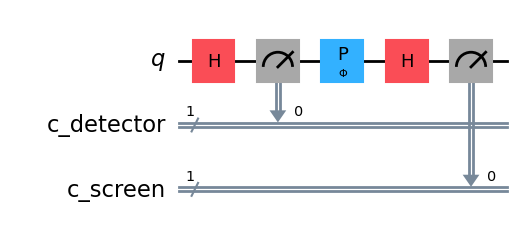

In [26]:
# 2. Setup the quantum circuit with its registers
qr = QuantumRegister(1, name='q')
cr1 = ClassicalRegister(1, name='c_detector')
cr2 = ClassicalRegister(1, name='c_screen')
double_slit_with_detector = QuantumCircuit(qr, cr1, cr2)

# 3. Define the parameter for the phase gate
Φ = Parameter('Φ')

# 4. Construct the circuit logic
# Apply the first H-gate to create a superposition.
double_slit_with_detector.h(qr[0])

# "Which-path" detector: Placed immediately after the first H-gate.
double_slit_with_detector.measure(qr[0], cr1[0])

# Apply a phase shift to the now-collapsed path.
double_slit_with_detector.p(Φ, qr[0])

# Apply the second H-gate.
double_slit_with_detector.h(qr[0])

# Perform the final measurement on the "screen".
double_slit_with_detector.measure(qr[0], cr2[0])

# 5. Draw the final circuit to visualize it
double_slit_with_detector.draw('mpl')

In [27]:
grade_lab1_ex3(double_slit_with_detector)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


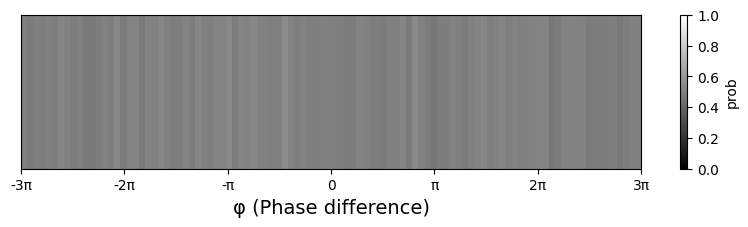

In [28]:
φ_lst = np.linspace(-3 * np.pi, 3 * np.pi, 100)
qc_isa = pm.run(double_slit_with_detector)

φ_hit = []
dist = sampler.run([(qc_isa, φ_lst)], shots=1000).result()[0].data.c_screen

for i  in range(len(φ_lst)):
    result = dist[i].get_counts()
    if '0' in result:
        φ_hit.append(result['0']/1000)
    else:
        φ_hit.append(0)

φ_hit_2d = np.array(φ_hit).reshape(1, -1)

plt.figure(figsize=(10, 2))
plt.imshow(φ_hit_2d, cmap='gray', aspect='auto', extent=[-3*np.pi, 3*np.pi, 0, 0.1], vmin=0, vmax=1)

plt.xlabel('φ (Phase difference)', fontsize=14)
plt.colorbar(label='prob')
plt.xticks(ticks=[-3 * np.pi, -2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi, 3 * np.pi],
           labels=['-3π', '-2π', '-π', '0', 'π', '2π', '3π'])
plt.yticks([])  
plt.show()

## Exercise 4: Quantum Circuit for CHSH Game

In [29]:
def create_chsh_circuit(x, y):
    """Builds a Qiskit circuit for Alice & Bob's quantum strategy."""
    qc = QuantumCircuit(2, 2, name=f'CHSH_{x}{y}')

    # --- TODO : Task 1 ---
    # Implement the gates to create the Bell state |Φ+> = (|00> + |11>)/sqrt(2).
    qc.h(0)
    qc.cx(0, 1)

    # --- End of TODO ---
    qc.barrier()

    # Step 2a: Alice's measurement basis (X if x=1, Z if x=0)
    if x == 1:
        qc.h(0) # H for X-basis measurement

    ## --- TODO: Task 2 ---
    # Step 2b: Bob's measurement basis
    # Optimal angles are +pi/4 for y=0 and -pi/4 for y=1.
    # To measure in a rotated basis theta, we apply Ry(-theta) to the qubit.
    if y == 0:
        qc.ry(-np.pi / 4, 1)
    else: # y == 1
        qc.ry(np.pi / 4, 1)

    # --- End of TODO ---
    qc.barrier()

    # Step 3: Measure
    qc.measure([0, 1], [0, 1]) # q0 to c0 (Alice), q1 to c1 (Bob) -> 'ba' format

    return qc

# Example of how to use the function and draw the circuit for x=1, y=0
# example_circuit = create_chsh_circuit(1, 0)
# example_circuit.draw('mpl')

In [30]:
grade_lab1_ex4(create_chsh_circuit)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


Quantum circuit for inputs x=1, y=1 (Check your Exercises 1 & 2 implementation):


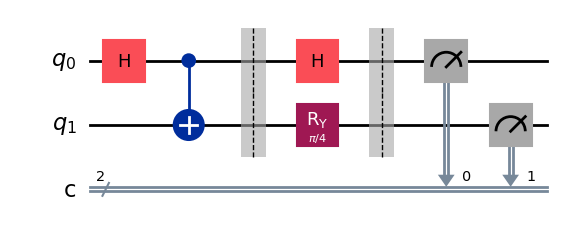

In [31]:
circuits = []
input_pairs = []
for x_in in [0, 1]:
    for y_in in [0, 1]:
        input_pairs.append((x_in, y_in))
        circuits.append(create_chsh_circuit(x_in, y_in))

print("Quantum circuit for inputs x=1, y=1 (Check your Exercises 1 & 2 implementation):")
if len(circuits) == 4:
    display(circuits[3].draw('mpl')) # (x,y) = (1,1)
else:
    print("Circuits not generated. Run previous cell after completing Exercises 1 & 2.")

Preparing circuits for the simulator...

--- Simulation Results (Counts) ---
Inputs (x=0, y=0):
  Outcomes (ba): {'00': 444, '01': 71, '10': 79, '11': 430}
Inputs (x=0, y=1):
  Outcomes (ba): {'00': 430, '01': 60, '10': 65, '11': 469}
Inputs (x=1, y=0):
  Outcomes (ba): {'00': 451, '01': 68, '10': 76, '11': 429}
Inputs (x=1, y=1):
  Outcomes (ba): {'00': 58, '01': 432, '10': 460, '11': 74}

Plotting results...


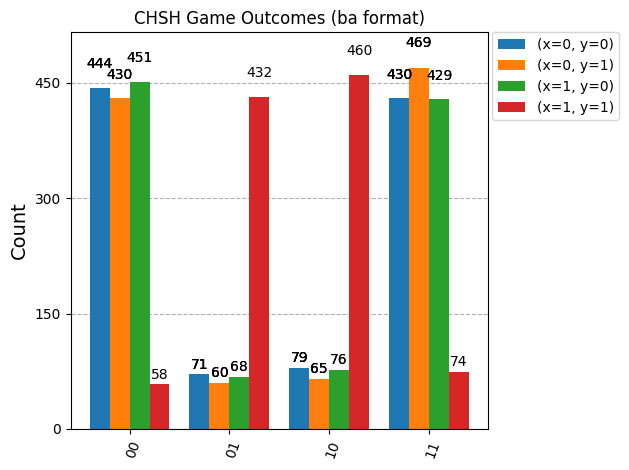

In [32]:
# AerSimulator (if not already defined)
# backend = AerSimulator()
# Pass manager (if not already defined)
# pm = generate_preset_pass_manager(backend=backend, optimization_level=1)

SHOTS = 1024

print("Preparing circuits for the simulator...")
isa_qc_chsh = pm.run(circuits)

sampler_chsh = Sampler(mode=backend) # SamplerV2
job_chsh = sampler_chsh.run(isa_qc_chsh, shots=SHOTS)
results_chsh = job_chsh.result()

# SamplerV2: results_chsh[i].data.c.get_counts() where 'c' is the default name of classical register
counts_list = [results_chsh[i].data.c.get_counts() for i in range(len(circuits))]

print("\n--- Simulation Results (Counts) ---")
for i, (x, y) in enumerate(input_pairs):
    print(f"Inputs (x={x}, y={y}):")
    sorted_counts = dict(sorted(counts_list[i].items()))
    print(f"  Outcomes (ba): {sorted_counts}")

print("\nPlotting results...")
display(plot_histogram(counts_list,
                       legend=[f'(x={x}, y={y})' for x, y in input_pairs],
                       title='CHSH Game Outcomes (ba format)'))

## Exercise 5: Analyze Circuit for CHSH Game

In [35]:
# This code assumes that 'input_pairs', 'counts_list', 'SHOTS',
# and the 'numpy' library (as np) are already defined and available.

# Initialize dictionary to store results
win_probabilities = {}
print("--- Calculating Win Probabilities ---")

# Loop through each input pair (x,y) and its corresponding results
for i, (x, y) in enumerate(input_pairs):
    counts = counts_list[i]

    # Task 1: Determine the winning condition (a XOR b = x AND y)
    target_xor_result = x & y

    wins_for_this_case = 0
    
    # Task 2: Count the number of shots that satisfy the winning condition
    for outcome, num_shots in counts.items():
        # The 'ba' format means b is the first char, a is the second
        b_val = int(outcome[0])
        a_val = int(outcome[1])

        # If the XOR of outputs matches the target, count it as a win
        if (a_val ^ b_val) == target_xor_result:
            wins_for_this_case += num_shots
            
    # Calculate and store the win probability for this case
    prob = wins_for_this_case / SHOTS if SHOTS > 0 else 0
    win_probabilities[(x, y)] = prob
    print(f"Inputs (x={x}, y={y}): Target (a XOR b) = {target_xor_result}. Win Probability = {prob:.4f}")

# --- This is the part that defines avg_win_prob ---

# Calculate the final average win probability and compare to theoretical limits
avg_win_prob = sum(win_probabilities.values()) / 4.0
P_win_quantum_theory = np.cos(np.pi / 8)**2
P_win_classical_limit = 0.75

# Print the summary of results
print(f"\n--- Overall Performance ---")
print(f"Experimental Average Win Probability: {avg_win_prob:.4f}")
print(f"Theoretical Quantum Win Probability: {P_win_quantum_theory:.4f}")
print(f"Classical Limit Win Probability:        {P_win_classical_limit:.4f}")

# Final check to see if the experiment was successful
if avg_win_prob > P_win_classical_limit + 0.01:
    print(f"\nSuccess! 🎉 Your result ({avg_win_prob:.4f}) clearly beats the classical 75% limit!")
    print(f"It's likely close to the theoretical quantum prediction of {P_win_quantum_theory:.4f}.")
elif avg_win_prob > P_win_classical_limit - 0.02:
    print(f"\nClose, but no cigar? Your result ({avg_win_prob:.4f}) is around the classical limit ({P_win_classical_limit:.4f}).")
    print("Check your solutions for Exercises 1-4 carefully, especially the win counting logic in Ex 4.")
else:
    print(f"\nHmmm, the result ({avg_win_prob:.4f}) is unexpectedly low, even below the classical limit.")
    print("There might be an error in Exercises 1-4. Please review your circuit and analysis code.")

--- Calculating Win Probabilities ---
Inputs (x=0, y=0): Target (a XOR b) = 0. Win Probability = 0.8535
Inputs (x=0, y=1): Target (a XOR b) = 0. Win Probability = 0.8779
Inputs (x=1, y=0): Target (a XOR b) = 0. Win Probability = 0.8594
Inputs (x=1, y=1): Target (a XOR b) = 1. Win Probability = 0.8711

--- Overall Performance ---
Experimental Average Win Probability: 0.8655
Theoretical Quantum Win Probability: 0.8536
Classical Limit Win Probability:        0.7500

Success! 🎉 Your result (0.8655) clearly beats the classical 75% limit!
It's likely close to the theoretical quantum prediction of 0.8536.


In [36]:
grade_lab1_ex5(counts_list, avg_win_prob)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


## Exercise 6: Quantum Teleportation

Full Teleportation Circuit (Exercises 1, 2, 3 Complete):


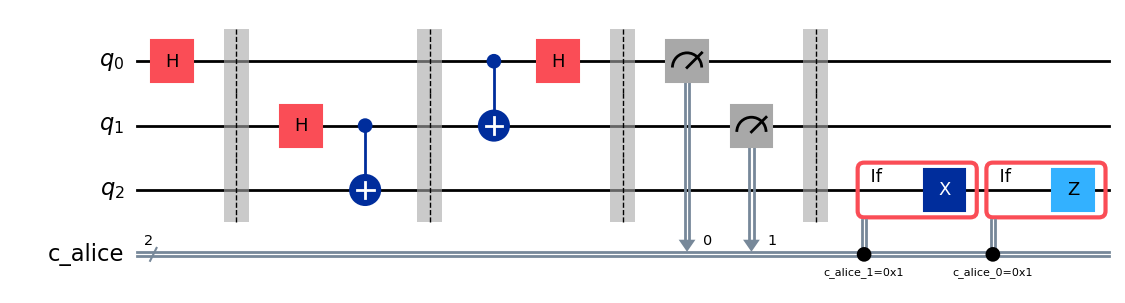


Circuit Summary:
           ┌───┐ ░            ░      ┌───┐ ░ ┌─┐    ░                       »
      q_0: ┤ H ├─░────────────░───■──┤ H ├─░─┤M├────░───────────────────────»
           └───┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░                       »
      q_1: ──────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░───────────────────────»
                 ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░      ┌──────     ┌───┐»
      q_2: ──────░──────┤ X ├─░────────────░──╫──╫──░──────┤ If-0  ────┤ X ├»
                 ░      └───┘ ░            ░  ║  ║  ░      └──╥───     └───┘»
                                              ║  ║    ┌───────╨───────┐     »
c_alice: 2/═══════════════════════════════════╩══╩════╡ c_alice_1=0x1 ╞═════»
                                              0  1    └───────────────┘     »
«                                                     
«      q_0: ──────────────────────────────────────────
«                                                     
«      q_1: ─────────────────────────

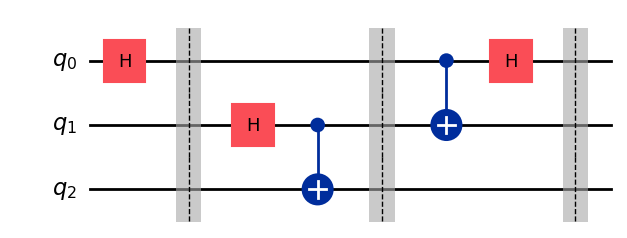

In [37]:
# Define quantum and classical registers
qr_tele = QuantumRegister(3, name='q')
cr_alice_tele = ClassicalRegister(2, name='c_alice') # For Alice's measurements

# For verification with statevector, we don't measure Bob's final qubit in this circuit.
# If we were to run on hardware and verify by counts, we'd add a classical bit for Bob.
teleport_qc = QuantumCircuit(qr_tele, cr_alice_tele, name='Teleportation')

# Prepare Alice's message state |ψ> = |+> on q0
teleport_qc.h(qr_tele[0])
teleport_qc.barrier()

# ---- TASK 1 SOLUTION ---
# Step 1: Create Bell pair between q1 (Alice) and q2 (Bob)
# Create entangled Bell pair |00⟩ + |11⟩ between q1 and q2
teleport_qc.h(qr_tele[1])        # Put q1 in superposition
teleport_qc.cx(qr_tele[1], qr_tele[2])  # Entangle q1 and q2
# --- End of TASK 1 --

teleport_qc.barrier()

# ---- TASK 2 SOLUTION ---
# Step 2: Alice's Bell Measurement (gates part)
# Alice performs Bell measurement on q0 (message) and q1 (her half of entangled pair)
teleport_qc.cx(qr_tele[0], qr_tele[1])  # CNOT with q0 as control, q1 as target
teleport_qc.h(qr_tele[0])               # Hadamard on q0
# --- End of TASK 2 --

teleport_qc.barrier()

# Alice measures her qubits q0 and q1
teleport_qc.measure(qr_tele[0], cr_alice_tele[0]) # q0 -> c0
teleport_qc.measure(qr_tele[1], cr_alice_tele[1]) # q1 -> c1
teleport_qc.barrier()

# ---- TASK 3 SOLUTION ---
# Step 3: Bob's Conditional Corrections on q2
# Using the modern Qiskit 1.0+ syntax with if_test context manager
# Bob applies corrections based on Alice's measurement results:
# - If c_alice[1] = 1: apply X gate (bit flip)
# - If c_alice[0] = 1: apply Z gate (phase flip)

# Conditional X gate based on Alice's measurement of q1
with teleport_qc.if_test((cr_alice_tele[1], 1)):
    teleport_qc.x(qr_tele[2])

# Conditional Z gate based on Alice's measurement of q0  
with teleport_qc.if_test((cr_alice_tele[0], 1)):
    teleport_qc.z(qr_tele[2])

# --- End of TASK 3 --

print("Full Teleportation Circuit (Exercises 1, 2, 3 Complete):")
display(teleport_qc.draw('mpl'))

# Optional: Print the circuit as text for verification
print("\nCircuit Summary:")
print(teleport_qc)

# Optional: Show the circuit depth and gate count
print(f"\nCircuit Statistics:")
print(f"Circuit depth: {teleport_qc.depth()}")
print(f"Number of qubits: {teleport_qc.num_qubits}")
print(f"Number of classical bits: {teleport_qc.num_clbits}")
print(f"Gate count: {teleport_qc.count_ops()}")

# Optional: Create a simplified verification circuit without conditional gates
# for statevector simulation
print("\n" + "="*50)
print("Verification Circuit (without conditional gates for statevector sim):")

# Create a separate circuit for statevector verification
verify_qc = QuantumCircuit(3, name='Teleportation_Verify')

# Prepare Alice's message state |+> on q0
verify_qc.h(0)
verify_qc.barrier()

# Create Bell pair between q1 and q2
verify_qc.h(1)
verify_qc.cx(1, 2)
verify_qc.barrier()

# Alice's Bell measurement gates
verify_qc.cx(0, 1)
verify_qc.h(0)
verify_qc.barrier()

# For verification, we can show what Bob's qubit should be
# without the conditional operations
print("Verification circuit (for statevector analysis):")
display(verify_qc.draw('mpl'))

In [38]:
grade_lab1_ex6(teleport_qc)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


## Exercise 7 - No Grading: Analyze result of Quantum Teleportation

In [39]:
%matplotlib inline

# Use Statevector Simulator
print("Using statevector simulator...")
sv_simulator = AerSimulator(method='statevector') # Explicitly set method for clarity
teleport_qc_sv = teleport_qc.copy() # Work with a copy for statevector simulation
teleport_qc_sv.save_statevector() # Save statevector at the end

print("Running statevector simulation...")
job_sv = sv_simulator.run(teleport_qc_sv) # shots=1 is default for statevector
result_sv = job_sv.result()

if result_sv.success:
    print("Simulation successful.")
    final_statevector = result_sv.get_statevector()
    print("Statevector retrieved successfully.")
    print("\nVisualizing final qubit states (q2 should match initial q0 state |+>):")
    # q0 was |+> (points along +X). After teleportation, q2 should be |+>.
    # q0 and q1 states are after Alice's measurement, so they'll be collapsed.
    
    display("TODO") #TODO, use plot_bloch_multivector to plot final_state
        
else:
    print(f"Statevector simulation failed! Status: {result_sv.status}")

Using statevector simulator...
Running statevector simulation...
Simulation successful.
Statevector retrieved successfully.

Visualizing final qubit states (q2 should match initial q0 state |+>):


'TODO'

In [40]:
from qc_grader.grader.grade import check_lab_completion_status
check_lab_completion_status("qgss_2025")

Lab 0: 2/2 exercises completed (100%)
    ✅ 2098 participants have completed this lab
Lab 1: 9/9 exercises completed (100%)
    ✅ 1451 participants have completed this lab
Lab 2: 0/7 exercises completed (0%)
    ✅ 703 participants have completed this lab
Lab 3: 0/5 exercises completed (0%)
    ✅ 403 participants have completed this lab
Lab 4: 0/6 exercises completed (0%)
    ✅ 164 participants have completed this lab
Functions Labs: 0/8 exercises completed (0%)
    ✅ 1 participants have completed this lab
